---
# Introduction

---

**Problem Statement:**

* Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time.
* How do card issuers know we’ll pay back what we charge? That’s a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.
* Credit default prediction is central to managing risk in a consumer lending business. 
 * Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. 
* Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.

* The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. 
 * The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

---
**Importing Libraries:**
* To get started we will use Python for data pre-processing and model building.
* Import python libraries as necessary to get started for data load and later import other libraries as needed
---

In [1]:
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# module finds all the pathnames matching a specified pattern
import glob 
import os
# importing pyplot interface using matplotlib
import matplotlib.pyplot as plt 
# importing seaborn library for interactive visualization
import seaborn as sns 
# Importing WordCloud for text data visualization
from wordcloud import WordCloud
# importing matplotlib for plots
import matplotlib
# importing datetime for using datetime
from datetime import datetime
# importing plotly for interactive plots
import plotly.express as px
# importing missingno for missing value plot
import missingno as msno
# importing regex library for use of regex
import re
# importing Counter for counting :)
from collections import Counter

import plotly.graph_objs as go

In [2]:
# importing SimpleImputer for handling missing value
from sklearn.impute import SimpleImputer
# importing MissingIndicator for handling missing value
from sklearn.impute import MissingIndicator
# importing StandardScaler for standardization
from sklearn.preprocessing import StandardScaler
# importing OnHotEncoder for encoding categorical variable
from sklearn.preprocessing import OneHotEncoder
# importing for transformation
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
# importing PCA for handling dimensonality reduction
from sklearn.decomposition import PCA

# importing pipeline for chaining model building activities
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as mp
# importing FeatureUnion for combining transformers
from sklearn.pipeline import FeatureUnion

# importing SMOTEENN for handling data imbalance
from imblearn.combine import SMOTEENN 
# importing SMOTE for handling data imbalance
from imblearn.over_sampling import SMOTE
# importing RandomOverSampler for oversampling
from imblearn.over_sampling import RandomOverSampler 
# importing RandomUnderSampler for undersampling
from imblearn.under_sampling import RandomUnderSampler 

# importing SelectFromModel to select features from model using Yellow bricks
from sklearn.feature_selection import SelectFromModel               
from yellowbrick.model_selection import FeatureImportances   

In [3]:
# importing train_test_split for train and validation split
from sklearn.model_selection import train_test_split
# importing RepeatedKFold for cross validation
from sklearn.model_selection import RepeatedKFold

# importing basic estimator for classification :)
from sklearn.linear_model import LogisticRegression
# importing next best estimator for classification :)
from sklearn.tree import DecisionTreeClassifier
# importing best estimator for classification :)
from sklearn.ensemble import RandomForestClassifier
# importing GaussianNB for Classification
from sklearn.naive_bayes import GaussianNB
# importing KNeighborsClassifier for Classification
from sklearn.neighbors import KNeighborsClassifier
# importing AdaBoostClassifier for Classification
from sklearn.ensemble import AdaBoostClassifier
# importing GradientBoostingClassifier for Classification
from sklearn.ensemble import GradientBoostingClassifier
# importing xgboost for Classification
import xgboost as xgb

# importing metrics required for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# importing confusion_matrix to evaluate accuracy of classification
from sklearn.metrics import confusion_matrix
# importing ConfusionMatrixDisplay for Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

# importing cross_validate for model evaluation
from sklearn.model_selection import cross_validate
# importing RepeatedStratifiedKFold for model evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
# importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

---
# Dataset Load
---

**Dataset:**

* **train_data.csv** - training data with multiple statement dates per customer_ID
* **train_labels.csv** - target label for each customer_ID
* **test_data.csv** - corresponding test data; objective is to predict the target label for each customer_ID
* **sample_submission.csv** - a sample submission file in the correct format

---

Let us check size of dataset CSV file

In [4]:
# calculate file size in KB, MB, GB
def convert_bytes(size):
    """ Convert bytes to KB, or MB or GB"""
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.1f %s" % (size, x)
        size /= 1024.0

# display CSV file with size
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csvfile=os.path.join(dirname, filename)
        csvfilesize = os.path.getsize(csvfile)
        filesize = convert_bytes(csvfilesize)
        print(f'{csvfile} size is', filesize, 'bytes')

/kaggle/input/amex-default-prediction/sample_submission.csv size is 59.1 MB bytes
/kaggle/input/amex-default-prediction/train_data.csv size is 15.3 GB bytes
/kaggle/input/amex-default-prediction/test_data.csv size is 31.5 GB bytes
/kaggle/input/amex-default-prediction/train_labels.csv size is 29.3 MB bytes


In [5]:
from pathlib import Path

input_path = Path('/kaggle/input/amex-default-prediction/')

---
Considering large number of rows around 5.5 million in **train_data.csv** dataset, using nrows option to load first 100k rows from dataset file for Model building.

---

---
Will try to leverage outcome based on EDA done so far

https://www.kaggle.com/code/girishkumarsahu/american-express-default-prediction-eda

---

Load train_data.csv dataset file using nrows=100000

In [6]:
# Loading dataset train_data.csv
train_df_sample = pd.read_csv('../input/amex-default-prediction/train_data.csv', nrows=100000)

In [7]:
# get shape of dataframe
print('Shape of dataset is:', train_df_sample.shape)

# print summary of dataframe
train_df_sample.info()

Shape of dataset is: (100000, 190)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 145.0+ MB


**Observations:**

* There are total 190 variables in train_data.csv dataset
    * There are 185 variables(Columns) as dtype float64, 1 variable(Column) as dtype int64 and 4 variables(Columns) as dtype object

---
Need to load **train_labels.csv** for customer_ID with target label as 1 for Default and 0 for Not Default

---

In [8]:
# Loading dataset train_labels.csv
train_label_df = pd.read_csv('../input/amex-default-prediction/train_labels.csv')

In [9]:
# get shape of dataframe
print('Shape of dataset is:', train_label_df.shape)

# print summary of dataframe
train_label_df.info()

Shape of dataset is: (458913, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


**Observations:**

* There are total 458,913 entries for target label with customer_ID
* There is variable (column) customer_ID which has dtype as object and variable (column) target which has dtype as int64

---
Using nrows option to load first 100k rows from **test_data.csv** dataset file.

---

In [10]:
# Loading dataset test_data.csv
test_df = pd.read_csv('../input/amex-default-prediction/test_data.csv', nrows=100000, index_col='customer_ID')

In [11]:
# get shape of dataframe
print('Shape of dataset is:', test_df.shape)

# print summary of dataframe
#test_df.info(verbose=True)
test_df.info()

Shape of dataset is: (100000, 189)
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7 to 0246c7eb137ed9b08014d66e29caf1772b0512becef11a1eda0948b8b8908576
Columns: 189 entries, S_2 to D_145
dtypes: float64(185), int64(1), object(3)
memory usage: 145.0+ MB


**Observation:**

* There are 185 variables(Columns) as dtype float64, 1 variable(Column) as dtype int64 and 4 variables(Columns) as dtype object, same structure as train_data.csv

---
Need to merge train_labels dataset with train_data dataset for target label.

---

In [12]:
# Merge of train_df_sample and train_label_df dataframe using key as customer_ID
train_df = pd.merge(train_df_sample, train_label_df, how="inner", on=["customer_ID"])

In [13]:
# print summary of merged dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 146.5+ MB


Drop S_2 variable which is date value and not required for ML model building

In [14]:
#drop customer_ID and S_2 which are not required for model building
train_df.drop(axis=1, columns=['customer_ID','S_2'], inplace=True)
#drop S_2 which is not required for model building
#train_df.drop(axis=1, columns=['S_2'], inplace=True)
#train_df.set_index('customer_ID', inplace=True)

In [15]:
#drop customer_ID and S_2 in test_df
#test_df.drop(axis=1, columns=['customer_ID','S_2'], inplace=True)
#drop S_2 in test_df
test_df.drop(axis=1, columns=['S_2'], inplace=True)

---
**Q: Is there any duplicate row in train dataset sample?**

---

In [16]:
#check if any duplicate row
if (any(train_df.duplicated())):
    print("Yes")
else:
    print("No")
    

No


---
**Q: Is there any duplicate row in test dataset sample?**

---

In [17]:
#check if any duplicate row in test dataset
if (any(test_df.duplicated())):
    print("Yes")
else:
    print("No")

No


---
**Q: Are there any missing value in train dataset sample?**

---

In [18]:
# Check for missing value
if(any(train_df.isna().sum())):
    print("Yes")
else:
    print("No")

Yes


---
**Q: Are there any missing value in train dataset sample?**

---

In [19]:
# Check for missing value in test dataset
if(any(test_df.isna().sum())):
    print("Yes")
else:
    print("No")

Yes


---
# Data Preprocessing

---

---
**Handle Variable with Missing Value**

---

---
Drop Variables with Missing Value (>=75%) in train dataset

---

In [20]:
#drop variables with missing values >=75% in the train dataframe
i=0
for col in train_df.columns:
    if (train_df[col].isnull().sum()/len(train_df[col])*100) >=75:
        print("Dropping column", col)
        train_df.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in train dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in train dataframe 23


---
Drop Variables with Missing Value (>=75%) in test dataset

---

In [21]:
#drop variables with missing values >=75% in the test dataframe
i=0
for col in test_df.columns:
    if (test_df[col].isnull().sum()/len(test_df[col])*100) >=75:
        print("Dropping column", col)
        test_df.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in test dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in test dataframe 23


Converting categorical variable dtype from float64 to object in train and test dataset

In [22]:
#convert dtype for B categorical variable to object
train_df = train_df.astype({"B_30": 'str', "B_38": 'str'})
#convert dtype for B categorical variable to object
test_df = test_df.astype({"B_30": 'str', "B_38": 'str'})
#convert dtype for D categorical variable to object
train_df = train_df.astype({"D_114": 'str', "D_116": 'str', "D_117": 'str', "D_120": 'str', "D_126": 'str', "D_68": 'str'})
#convert dtype for D categorical variable to object
test_df = test_df.astype({"D_114": 'str', "D_116": 'str', "D_117": 'str', "D_120": 'str', "D_126": 'str', "D_68": 'str'})

Separate independent and dependent variable for train dataframe

In [23]:
# separate X and y for further processing
X = train_df.drop(columns='target')
y = train_df['target']

In [24]:
print("Shape of X", X.shape)

Shape of X (100000, 165)


In [25]:
print("Shape of y", y.shape)

Shape of y (100000,)


Separate training and validation set for train dataframe

In [26]:
# splitting training data into training and testing (validation) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [27]:
print("Shape of X_train", X_train.shape)

Shape of X_train (75000, 165)


In [28]:
print("Shape of X_test", X_test.shape)

Shape of X_test (25000, 165)


In [29]:
print("Shape of y_train", y_train.shape)

Shape of y_train (75000,)


In [30]:
print("Shape of y_test", y_test.shape)

Shape of y_test (25000,)


Separate Categorical and Numerical variables (columns) for train dataframe

In [31]:
# define categorical variables (columns)
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical variables (columns) are: {categorical}")

# define numerical variables (columns)
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical variables (columns) are: {numerical}")

Categorical variables (columns) are: ['D_63', 'D_64', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
Numerical variables (columns) are: ['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'P_4', 'D_74', 'D_75', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'S_18', 'D_86', 'R_17', 'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_

---
**Handle Categorical Variable (Column)**

---

In [32]:
# define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scaler', StandardScaler())
])

print(cat_pipe)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])


---
**Handle Numerical Variable (Column)**

---

In [33]:
# define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('scaler', StandardScaler())
])
print(num_pipe)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())])


Combine Categorical and Numerical Pipeline Steps

In [34]:
# combine categorical and numerical pipeline
preprocess = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

print(preprocess)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['D_63', 'D_64', 'D_68', 'B_30', 'B_38',
                                  'D_114', 'D_116', 'D_117', 'D_120',
                                  'D_126']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 

---
# Model Building/Evaluation

---

Amex Evaluation Metric for reference

In [35]:
# please refer sample notebook provided under competition page
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()
    
    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

Using multiple classifier with pipeline steps for Model Building & Evaluation

In [36]:
# using some of the best known classifiers
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
    ]
print("Using preprocess, smote, under sampler, feature selection and PCA")
print("preprocess - Categorical: Missing value Impute, OneHotEncoding and Scaling")
print("preprocess - Numerical: Missing value Impute and Scaling")
print("###########################################################################")
for classifier in classifiers:
    steps = [
        ('preprocess', preprocess),
        ('smote',SMOTE(random_state=42)),
        ('under_sampler',RandomUnderSampler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators = 10, random_state = 42, n_jobs = -1))),
        ('pca', PCA(n_components='mle',random_state = 42)),
        ('model_estimator', classifier) 
    ]
    pipe = Pipeline(steps, verbose=True)
    model = pipe.fit(X_train, y_train)  
    print("#######################################################################")
    print(classifier)
    print("#######################################################################")
    print (model)
    print("model training score: %.3f" % pipe.score(X_train, y_train))
    print("model validation score: %.3f" % pipe.score(X_test, y_test))
    print("#######################################################################")
    print("Amex Evaluation Metric - Training: %.3f"% amex_metric(pd.DataFrame(y_train), pd.DataFrame(pipe.predict(X_train), columns=['prediction'])))
    print("Amex Evaluation Metric - Validation: %.3f"% amex_metric(pd.DataFrame(y_test), pd.DataFrame(pipe.predict(X_test), columns=['prediction'])))
    print("#######################################################################")

Using preprocess, smote, under sampler, feature selection and PCA
preprocess - Categorical: Missing value Impute, OneHotEncoding and Scaling
preprocess - Numerical: Missing value Impute and Scaling
###########################################################################
[Pipeline] ........ (step 1 of 6) Processing preprocess, total=   2.9s
[Pipeline] ............. (step 2 of 6) Processing smote, total=  19.1s
[Pipeline] ..... (step 3 of 6) Processing under_sampler, total=   0.1s
[Pipeline] . (step 4 of 6) Processing feature_selection, total=  10.8s
[Pipeline] ............... (step 5 of 6) Processing pca, total=   0.4s
[Pipeline] ... (step 6 of 6) Processing model_estimator, total=   0.0s
#######################################################################
KNeighborsClassifier()
#######################################################################
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                             

Using XGBClassifier

TBD

Using LGBMClassifier

TBD

Using Cross-Validation

TBD

In [37]:
#pipe.set_params(model_estimator=xgb)
#scoring ={'recall_score':'recall','f1_score':'f1','amex_metric':make_scorer(amex_metric)}
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
#scores = cross_validate(pipe, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1,return_train_score=True)
# print("Model Training Score:")
# print('Recall: {:.2f}, f1-score: {:.2f}, Amex Metric: {:.2f}'.format(np.mean(scores['train_recall_score']), np.mean(scores['train_f1_score']), np.mean(scores['train_amex_metric'])))
# print("#######################################################################")
# print("Model Validation Score:")
# print('Recall: {:.2f}, f1-score: {:.2f}, Amex Metric: {:.2f}'.format(np.mean(scores['test_recall_score']), np.mean(scores['test_f1_score']), np.mean(scores['test_amex_metric'])))


---
**Prediction/Sample Submission file**

---

In [38]:
test_df.reset_index(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [39]:
X_test_predict = test_df.groupby('customer_ID').tail(1)

In [40]:
X_test_predict.shape

(8154, 166)

In [41]:
X_test_predict.set_index('customer_ID', inplace=True)

Prediction on test dataset 

In [42]:
# prediction on test dataset using pipeline steps
y_test_pred = pipe.predict(X_test_predict)

Generation of submission.csv file with customer_ID and prediction as header

In [43]:
# generate submission file
output = pd.DataFrame({'customer_ID': X_test_predict.index,'prediction': y_test_pred})
output.to_csv('submission.csv', index=False, header=True)

---
# Summary

---

* Variables (Columns) with missing value >= 75% was removed
* SimpleImputer was used for Variables (Columns) with missing value <= 25%
* OneHotEncoder was used for encoding Categorical Variables
* SMOTE was used to address Data Imbalance along with RandomUnderSampler
* RandomForestClassifier was used for Feature Selection
* PCA was used for Dimensionality Reduction



---
# Next Steps

---

* **For Model Selection and Submission**
    * Usage of GridSearchCV or RandomizedSearchCV to search hyperparameter for model
    * Model selection based on best cross validation score 
    * Minimum 925000+ unique test data points needed for prediction in submission file
    * Generate submission.csv file with customer_ID and prediction as header

---
**Thank you and Happy Learning.**

---

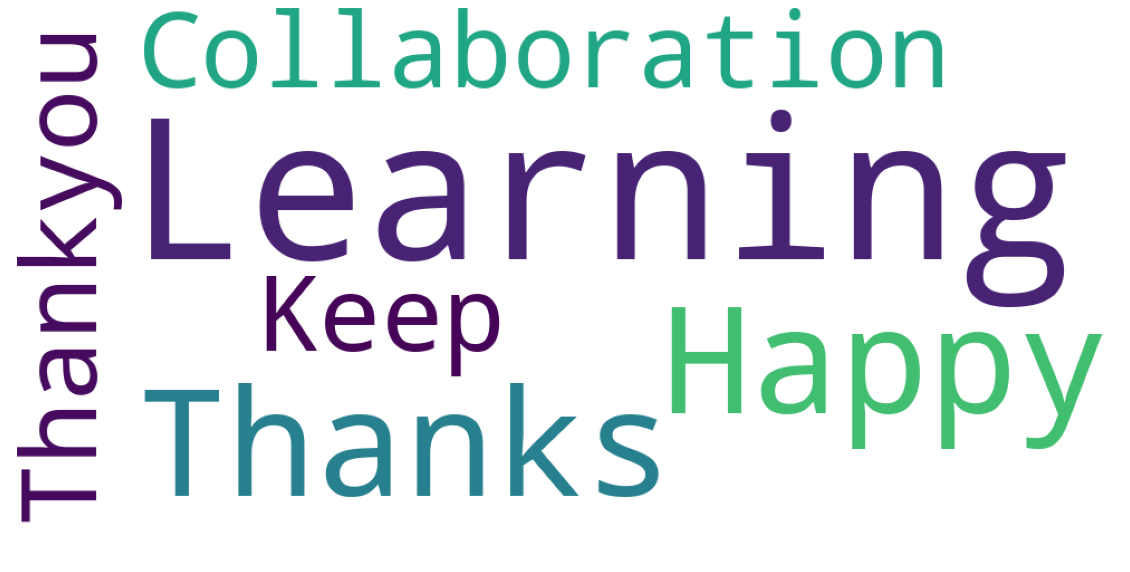

In [44]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()